# Evaluation Techniques for classification models

### Load and Prepare the Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, roc_auc_score

In [2]:
data = pd.read_csv ('test.csv')

In [3]:
data

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [5]:
data.shape

(1000, 21)

In [6]:
data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [30]:
features = data.drop(columns=['id', 'three_g'])
target = data['three_g']

### Standardize the features

In [31]:
scaler = StandardScaler()
X = scaler.fit_transform(features)
y = target.values

In [32]:
X

array([[-0.47545131,  0.968496  ,  0.31260069, ..., -1.65335542,
         1.        , -1.01409939],
       [-0.94278218,  0.968496  , -1.25583195, ..., -0.74341848,
        -1.        , -1.01409939],
       [ 1.29207729,  0.968496  ,  1.51908734, ..., -0.19745632,
         1.        ,  0.98609664],
       ...,
       [-0.1469316 , -1.03252879, -0.16999397, ...,  0.53049324,
        -1.        , -1.01409939],
       [ 0.65817305,  0.968496  , -1.25583195, ..., -0.92540587,
         1.        , -1.01409939],
       [ 0.04971753,  0.968496  , -1.25583195, ..., -1.47136804,
        -1.        ,  0.98609664]])

### Split the data into training and testing sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Train the Logistic Regression model

In [34]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

### Make predictions

In [35]:
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

In [36]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1], dtype=int64)

In [37]:
y_prob

array([0.42632352, 0.99584753, 0.99661262, 0.54518697, 0.62456679,
       0.99741017, 0.99786021, 0.99720443, 0.99491592, 0.65083111,
       0.9981125 , 0.40759006, 0.99797471, 0.58470933, 0.99332159,
       0.50780501, 0.99706865, 0.41934937, 0.65416605, 0.56070361,
       0.9962737 , 0.62420978, 0.99751761, 0.61806555, 0.99829444,
       0.48179515, 0.46064818, 0.62181532, 0.53727695, 0.43059153,
       0.65161483, 0.99580365, 0.99626839, 0.99735697, 0.55196369,
       0.99611689, 0.46209521, 0.47912437, 0.47554277, 0.55089192,
       0.51815345, 0.61753861, 0.99723666, 0.40692643, 0.46266325,
       0.30926586, 0.51499494, 0.63768961, 0.64403132, 0.50071601,
       0.57576718, 0.60931033, 0.41806938, 0.52409074, 0.37341544,
       0.99652877, 0.99754176, 0.54518319, 0.50731555, 0.99513703,
       0.532917  , 0.48698261, 0.99691894, 0.99688785, 0.9966752 ,
       0.99651415, 0.54996521, 0.99699789, 0.66175795, 0.99701802,
       0.99704864, 0.62494732, 0.61643371, 0.99870091, 0.99725

### Confusion Matrix

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[ 16  34]
 [ 26 124]]


### Accuracy

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


### Precision

In [40]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

Precision: 0.78


### Recall

In [41]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Recall: 0.83


### F1 Score

In [43]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.81


 ### ROC Curve and AUC

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [49]:
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.77


### If you want to show the Plotting of the ROC Curve

In [50]:
import matplotlib.pyplot as plt

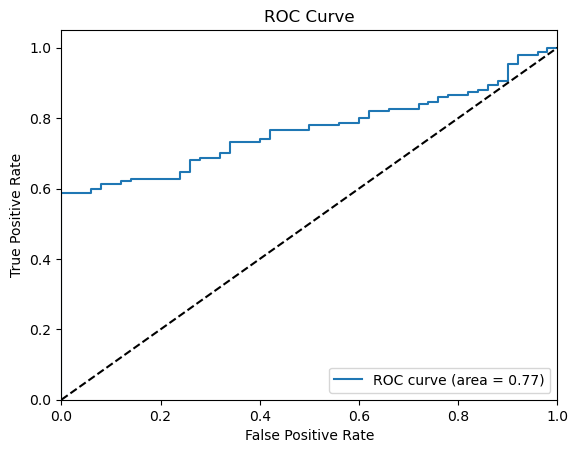

In [54]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score

In [58]:
cv_scores = cross_val_score(log_reg, X, y, cv=5)

In [61]:
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores):.2f}")

Cross-Validation Scores: [0.765 0.72  0.72  0.775 0.735]
Mean CV Score: 0.74


### Classification Report

In [64]:
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.32      0.35        50
           1       0.78      0.83      0.81       150

    accuracy                           0.70       200
   macro avg       0.58      0.57      0.58       200
weighted avg       0.68      0.70      0.69       200

